In [2]:
import numpy as np
import cv2
from show_image import *
from datascience import *
import math
%matplotlib inline

---

- ## 모폴로지
    - ### 영상 내에서 불필요한 잡음 제거, 객체를 뚜렷하게 하여 필요한 요소 추출


---

- ## 침식 연산
    - ### 입력 영상의 화소와 마스크 원소가 모두 일치해야 출력 화소를 1로 지정
    - ### cv2.erode(src, kernel)

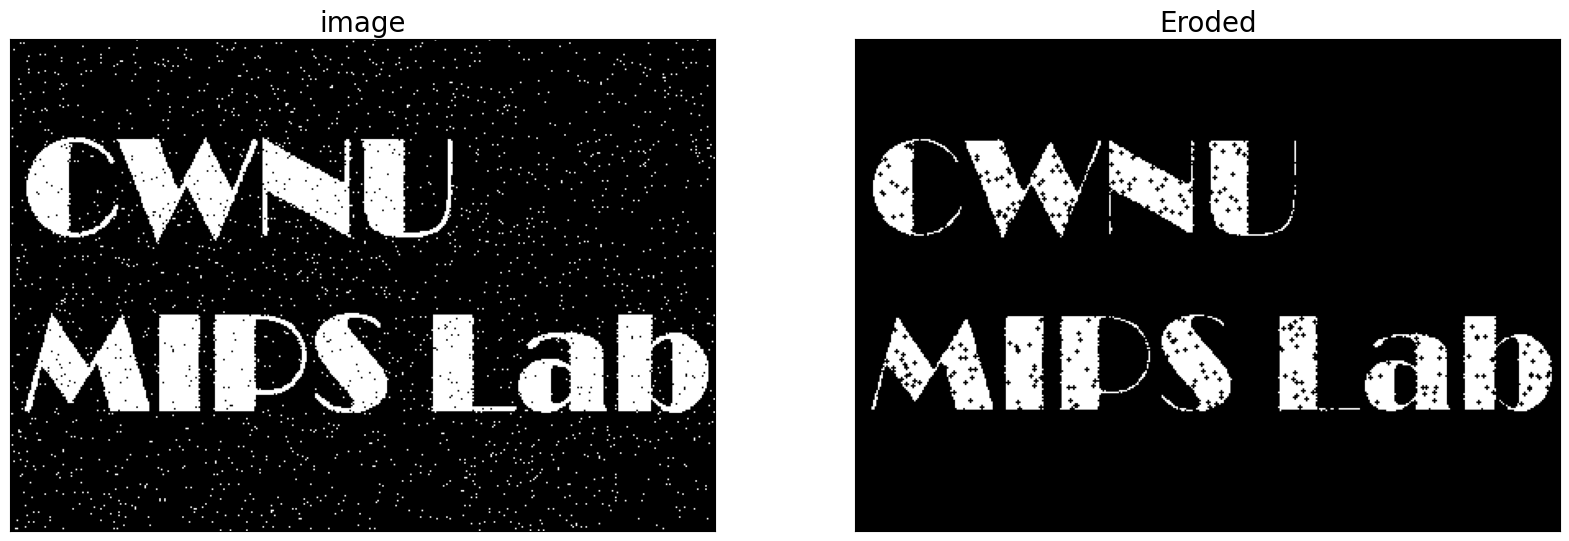

In [12]:
def erode_img(image, mask):
    mask_nonzero = np.count_nonzero(mask)
    
    filtered = np.zeros(image.shape[:2], dtype="uint8")
    image_h, image_w = image.shape[:2]
    filter_padding_y, filter_padding_x = (mask.shape[0] // 2, mask.shape[1] // 2)
    for y in range(filter_padding_y, image_h - filter_padding_y):
        for x in range(filter_padding_x, image_w  - filter_padding_x):
            curr_region = image[y - filter_padding_y: y + filter_padding_y + 1, x - filter_padding_x: x + filter_padding_x + 1]

            curr_pixel = 0
            if np.count_nonzero(cv2.bitwise_and(curr_region, mask)) == mask_nonzero:
                curr_pixel = 255
            filtered[y][x] = curr_pixel

    return filtered

image = cv2.imread("./images/chap07/morph.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1] # 영상 이진화: 밝기값 128~255인 픽셀 전부 255로 변경

mask = [[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]]
mask = np.array(mask, dtype="uint8")

show_images({"image": image, "Eroded": erode_img(image, mask)}, 20)

- ### 글자 내부의 작은 공간이 더 넓어졌음

---

- ## 팽창 연산
    - ### 입력 영상의 원소와 마스크 원소가 한 개라도 일치하면 출력 화소를 1로 지정
    - ### cv2.dilate(src, kernel)

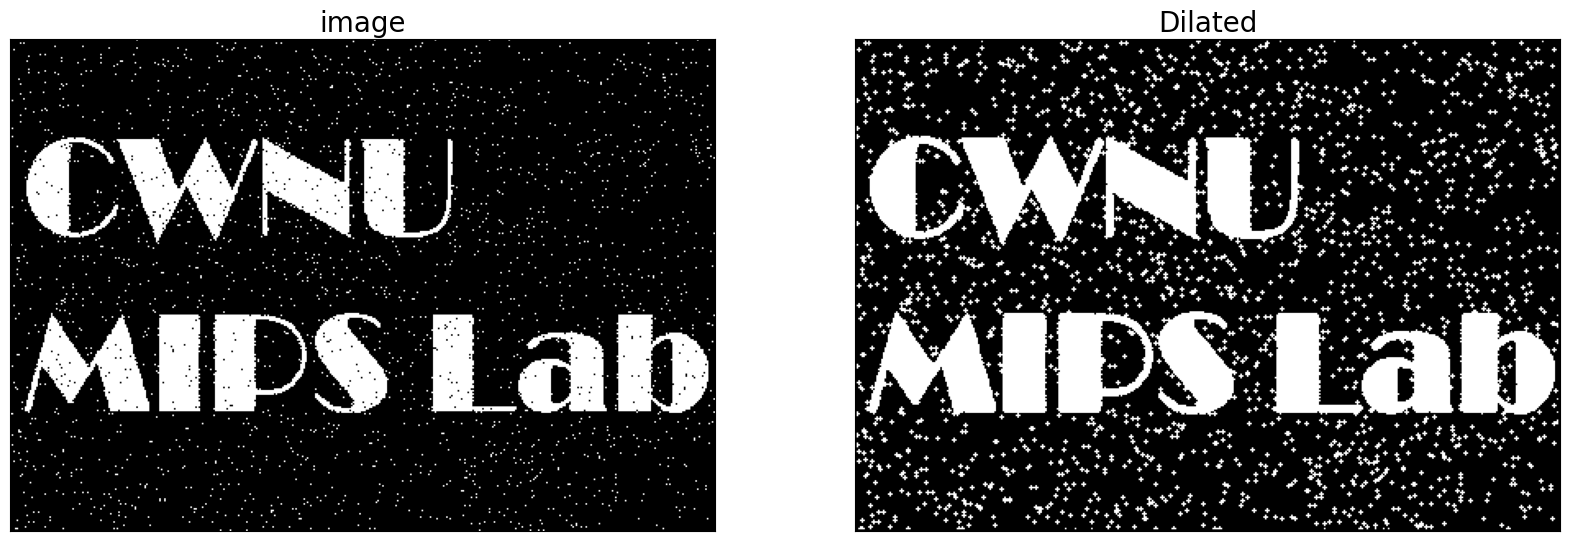

In [14]:
def dilate_img(image, mask):
    mask_nonzero = np.count_nonzero(mask)
    
    filtered = np.zeros(image.shape[:2], dtype="uint8")
    image_h, image_w = image.shape[:2]
    filter_padding_y, filter_padding_x = (mask.shape[0] // 2, mask.shape[1] // 2)
    for y in range(filter_padding_y, image_h - filter_padding_y):
        for x in range(filter_padding_x, image_w  - filter_padding_x):
            curr_region = image[y - filter_padding_y: y + filter_padding_y + 1, x - filter_padding_x: x + filter_padding_x + 1]

            curr_pixel = 0
            if np.count_nonzero(cv2.bitwise_and(curr_region, mask)) >= 1:
                curr_pixel = 255
            filtered[y][x] = curr_pixel

    return filtered

image = cv2.imread("./images/chap07/morph.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1] # 영상 이진화: 밝기값 128~255인 픽셀 전부 255로 변경

mask = [[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]]
mask = np.array(mask, dtype="uint8")

show_images({"image": image, "Dilated": dilate_img(image, mask)}, 20)

- ### 객체가 확장되어 뚜렷하게 나타나지만 배경부분의 잡음도 확장됨

---

- ## 열림 연산
    - ### 침식 연산 수행 후 팽창 연산 수행
        - #### 미세 잡음 제거한 후 객체만 팽창

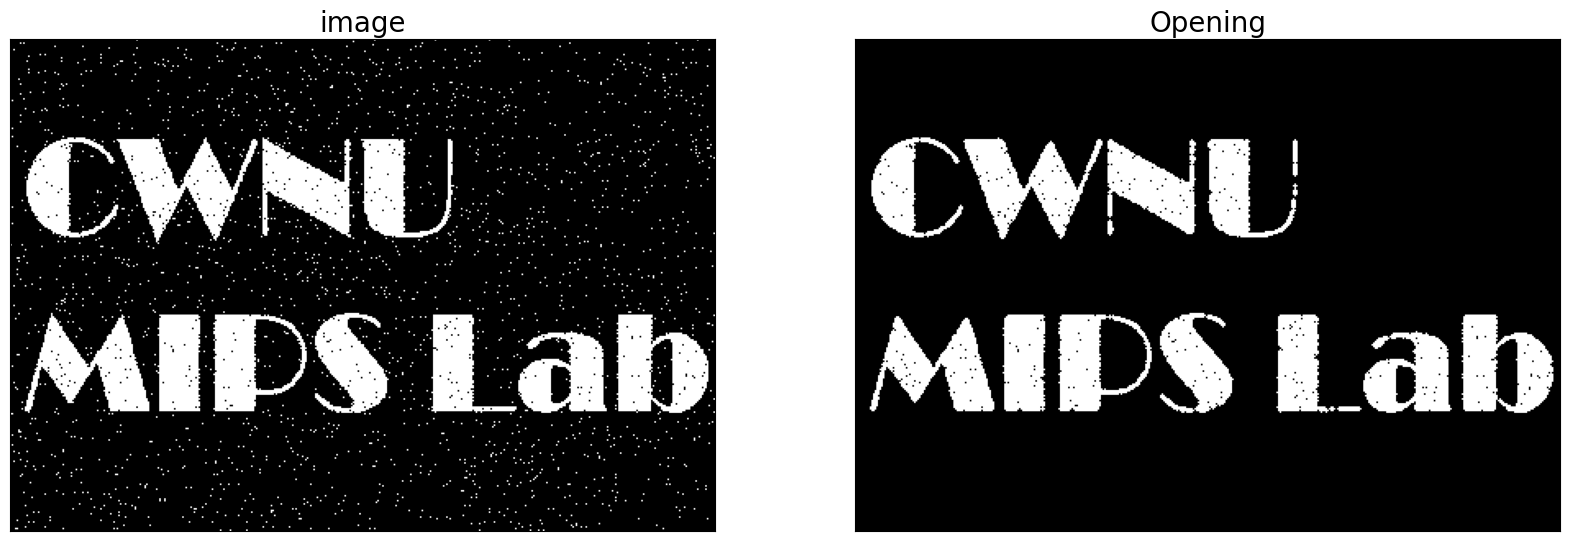

In [15]:
image = cv2.imread("./images/chap07/morph.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1] # 영상 이진화: 밝기값 128~255인 픽셀 전부 255로 변경

mask = [[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]]
mask = np.array(mask, dtype="uint8")

opened_image = erode_img(image, mask)
opened_image = dilate_img(opened_image, mask)

show_images({"image": image, "Opening": opened_image}, 20)

---

- ## 닫힘 연산
    - ### 팽창 연산 수행 후 침식 연산 수행
        - #### 객체 내부의 빈 공간 메운 후 확장되었던 객체 크기 원래대로 축소

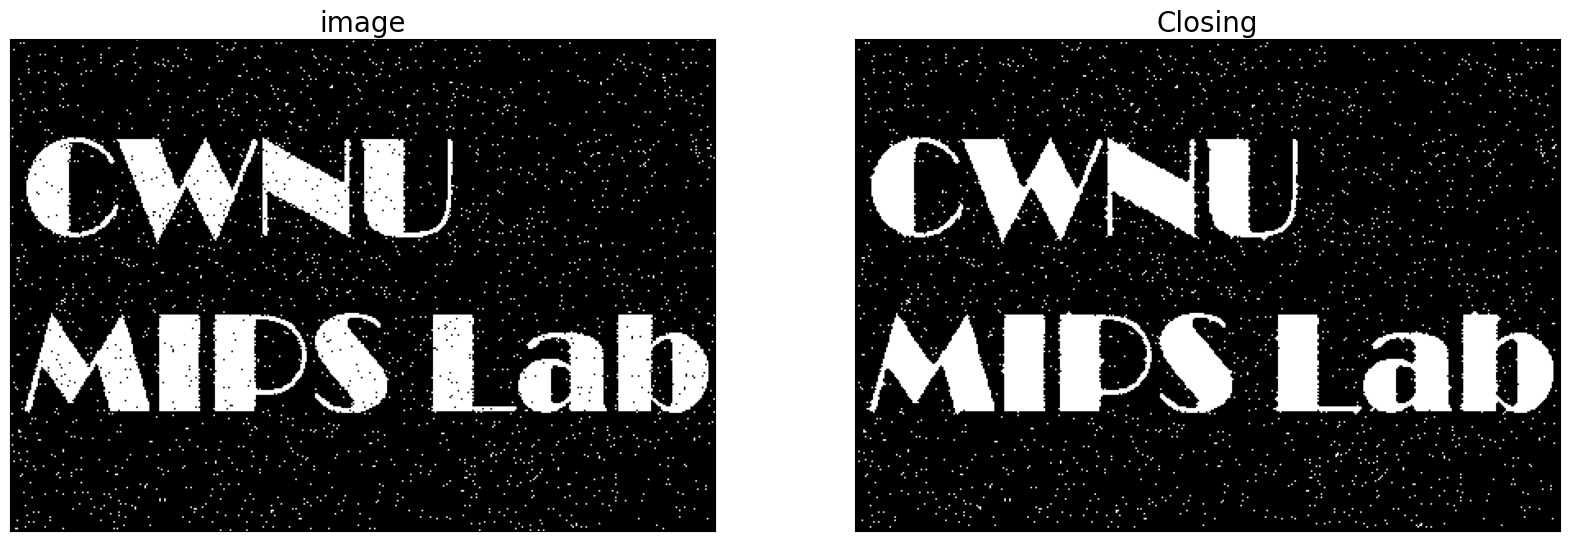

In [16]:
image = cv2.imread("./images/chap07/morph.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1] # 영상 이진화: 밝기값 128~255인 픽셀 전부 255로 변경

mask = [[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]]
mask = np.array(mask, dtype="uint8")

closed_image = dilate_img(image, mask)
closed_image = erode_img(closed_image, mask)

show_images({"image": image, "Closing": closed_image}, 20)